# 数据预处理

In [1]:
import urllib.request
import os
import tarfile

In [2]:
url="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"
filepath=r"D:\Documents\Project\Python\Jupyter\机器学习\MP21710_example\example\data\aclImdb_v1.tar.gz"
if not os.path.isfile(filepath):
    result=urllib.request.urlretrieve(url,filepath)
    print('downloaded:',result)

In [4]:
if not os.path.exists(r"D:\Documents\Project\Python\Jupyter\机器学习\MP21710_example\example\data\aclImdb"):
    tfile=tarfile.open(filepath,'r:gz')
    result=tfile.extractall(r"D:\Documents\Project\Python\Jupyter\机器学习\MP21710_example\example\data")

In [5]:
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
import re
def rm_tags(text):
    re_tag=re.compile(r'<[^>]+>')
    return re_tag.sub('',text)

In [9]:
import os
def read_file(filetype):
    path="D:/Documents/Project/Python/Jupyter/机器学习/MP21710_example/example/data/aclImdb/"
    file_list=[]
    
    positive_path=path+filetype+'/pos/'
    for f in os.listdir(positive_path):
        file_list+=[positive_path+f]
    
    negative_path=path+filetype+'/neg/'
    for f in os.listdir(negative_path):
        file_list+=[negative_path+f]
    
    print('read',filetype,'files:',len(file_list))
    
    all_labels=([1]*12500 + [0]*12500)
    all_texts=[]
    
    for fi in file_list:
        with open(fi,encoding='utf8') as file_input:
            all_texts+=[rm_tags(" ".join(file_input.readlines()))]
    return all_labels,all_texts

In [10]:
y_train,train_text=read_file("train")

read train files: 25000


In [11]:
y_test,train_test=read_file("test")

read test files: 25000


In [12]:
train_text[0]

'Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High\'s satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers\' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I\'m here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn\'t!'

In [13]:
y_train[0]

1

In [16]:
train_text[12501]

"Airport '77 starts as a brand new luxury 747 plane is loaded up with valuable paintings & such belonging to rich businessman Philip Stevens (James Stewart) who is flying them & a bunch of VIP's to his estate in preparation of it being opened to the public as a museum, also on board is Stevens daughter Julie (Kathleen Quinlan) & her son. The luxury jetliner takes off as planned but mid-air the plane is hi-jacked by the co-pilot Chambers (Robert Foxworth) & his two accomplice's Banker (Monte Markham) & Wilson (Michael Pataki) who knock the passengers & crew out with sleeping gas, they plan to steal the valuable cargo & land on a disused plane strip on an isolated island but while making his descent Chambers almost hits an oil rig in the Ocean & loses control of the plane sending it crashing into the sea where it sinks to the bottom right bang in the middle of the Bermuda Triangle. With air in short supply, water leaking in & having flown over 200 miles off course the problems mount for 

In [17]:
y_train[12501]

0

In [24]:
test_text=train_test

In [14]:
import numpy as np

In [15]:
np.save('IMDB_y_train',y_train)
np.save('IMDB_train_text',train_text)
np.save('IMDB_y_test',y_test)
np.save('IMDB_test_text',test_text)

In [18]:
token=Tokenizer(num_words=2000)
token.fit_on_texts(train_text)

In [19]:
print(token.document_count)

25000


In [29]:
x_train_seq=token.texts_to_sequences(train_text)
x_test_seq=token.texts_to_sequences(test_text)

In [30]:
print(train_text[0])

Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I'm here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn't!


In [31]:
print(x_train_seq[0])

[308, 6, 3, 1068, 208, 8, 29, 1, 168, 54, 13, 45, 81, 40, 391, 109, 137, 13, 57, 149, 7, 1, 481, 68, 5, 260, 11, 6, 72, 5, 631, 70, 6, 1, 5, 1, 1530, 33, 66, 63, 204, 139, 64, 1229, 1, 4, 1, 222, 899, 28, 68, 4, 1, 9, 693, 2, 64, 1530, 50, 9, 215, 1, 386, 7, 59, 3, 1470, 798, 5, 176, 1, 391, 9, 1235, 29, 308, 3, 352, 343, 142, 129, 5, 27, 4, 125, 1470, 5, 308, 9, 532, 11, 107, 1466, 4, 57, 554, 100, 11, 308, 6, 226, 47, 3, 11, 8, 214]


In [32]:
x_train=sequence.pad_sequences(x_train_seq,maxlen=100)
x_test=sequence.pad_sequences(x_test_seq,maxlen=100)

In [34]:
print('before pad_sequences length=',len(x_train_seq[0]))
print(x_train_seq[0])

before pad_sequences length= 106
[308, 6, 3, 1068, 208, 8, 29, 1, 168, 54, 13, 45, 81, 40, 391, 109, 137, 13, 57, 149, 7, 1, 481, 68, 5, 260, 11, 6, 72, 5, 631, 70, 6, 1, 5, 1, 1530, 33, 66, 63, 204, 139, 64, 1229, 1, 4, 1, 222, 899, 28, 68, 4, 1, 9, 693, 2, 64, 1530, 50, 9, 215, 1, 386, 7, 59, 3, 1470, 798, 5, 176, 1, 391, 9, 1235, 29, 308, 3, 352, 343, 142, 129, 5, 27, 4, 125, 1470, 5, 308, 9, 532, 11, 107, 1466, 4, 57, 554, 100, 11, 308, 6, 226, 47, 3, 11, 8, 214]


In [35]:
print('after pad_sequences length=',len(x_train[0]))
print(x_train[0])

after pad_sequences length= 100
[  29    1  168   54   13   45   81   40  391  109  137   13   57  149
    7    1  481   68    5  260   11    6   72    5  631   70    6    1
    5    1 1530   33   66   63  204  139   64 1229    1    4    1  222
  899   28   68    4    1    9  693    2   64 1530   50    9  215    1
  386    7   59    3 1470  798    5  176    1  391    9 1235   29  308
    3  352  343  142  129    5   27    4  125 1470    5  308    9  532
   11  107 1466    4   57  554  100   11  308    6  226   47    3   11
    8  214]


In [44]:
print('before pad_sequences length=',len(x_train_seq[6]))
print(x_train_seq[6])

before pad_sequences length= 88
[418, 90, 31, 494, 5, 93, 3, 547, 1779, 706, 1, 61, 7, 323, 133, 21, 88, 56, 1493, 8, 1444, 474, 235, 30, 1691, 1, 7, 1, 18, 66, 302, 1739, 2, 66, 238, 85, 72, 21, 353, 1, 18, 186, 1, 110, 6, 51, 1724, 1, 16, 148, 1639, 21, 2, 127, 21, 191, 5, 397, 21, 1531, 1, 459, 6, 48, 357, 4, 5, 4, 835, 2, 6, 48, 51, 323, 301, 54, 102, 44, 21, 22, 263, 5, 141, 2, 838, 3, 342, 61]


In [45]:
print('after pad_sequences length=',len(x_train[6]))
print(x_train[6])

after pad_sequences length= 100
[   0    0    0    0    0    0    0    0    0    0    0    0  418   90
   31  494    5   93    3  547 1779  706    1   61    7  323  133   21
   88   56 1493    8 1444  474  235   30 1691    1    7    1   18   66
  302 1739    2   66  238   85   72   21  353    1   18  186    1  110
    6   51 1724    1   16  148 1639   21    2  127   21  191    5  397
   21 1531    1  459    6   48  357    4    5    4  835    2    6   48
   51  323  301   54  102   44   21   22  263    5  141    2  838    3
  342   61]


# mlp感知机

In [46]:
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.embeddings import Embedding

In [47]:
model = Sequential()
model.add(Embedding(output_dim=32,input_dim=2000,input_length=100))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=256,activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(units=1,activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 32)           64000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 32)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               819456    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 883,713
Trainable params: 883,713
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history=model.fit(x=x_train,y=y_train,validation_split=0.2,epochs=10,batch_size=300,verbose=1)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 120us/step - loss: 0.5709 - acc: 0.6901 - val_loss: 0.6019 - val_acc: 0.7220
Epoch 2/10
20000/20000 [==============================] - 0s 21us/step - loss: 0.3162 - acc: 0.8650 - val_loss: 0.5044 - val_acc: 0.7674
Epoch 3/10
20000/20000 [==============================] - 0s 20us/step - loss: 0.2287 - acc: 0.9097 - val_loss: 0.5073 - val_acc: 0.7776
Epoch 4/10
20000/20000 [==============================] - 0s 20us/step - loss: 0.1564 - acc: 0.9445 - val_loss: 0.4722 - val_acc: 0.8130
Epoch 5/10
20000/20000 [==============================] - 0s 20us/step - loss: 0.0949 - acc: 0.9695 - val_loss: 0.5899 - val_acc: 0.7996
Epoch 6/10
20000/20000 [==============================] - 0s 20us/step - loss: 0.0574 - acc: 0.9829 - val_loss: 0.7648 - val_acc: 0.7780
Epoch 7/10
20000/20000 [==============================] - 0s 21us/step - loss: 0.0374 - acc: 0.9901 - val_loss: 0.8578 - val_acc

In [49]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

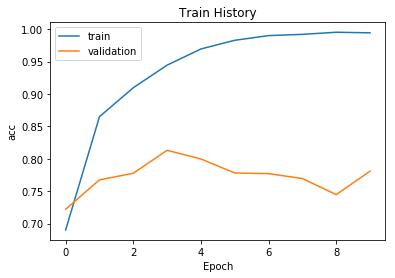

In [50]:
show_train_history(train_history,'acc','val_acc')

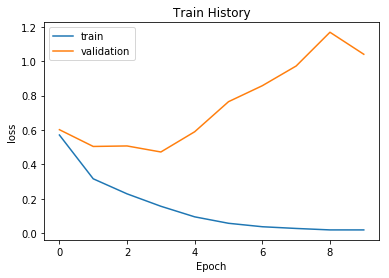

In [51]:
show_train_history(train_history,'loss','val_loss')

In [53]:
scores=model.evaluate(x_test,y_test)
print()
print('accuracy=',scores[1])

25000/25000 [==============================] - 1s 40us/step

accuracy= 0.81788


In [54]:
predict=model.predict_classes(x_test)

In [55]:
predict[:10]

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1]])

In [57]:
predict_calsses=predict.reshape(-1)
predict_calsses[:10]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [58]:
SentimentDict={1:'正面的',0:'负面的'}
def display_test_Sentiment(i):
    print(test_text[i])
    print('label真实值:',SentimentDict[y_test[i]],'预测结果:',SentimentDict[predict_calsses[i]])

In [59]:
display_test_Sentiment(2)

As a recreational golfer with some knowledge of the sport's history, I was pleased with Disney's sensitivity to the issues of class in golf in the early twentieth century. The movie depicted well the psychological battles that Harry Vardon fought within himself, from his childhood trauma of being evicted to his own inability to break that glass ceiling that prevents him from being accepted as an equal in English golf society. Likewise, the young Ouimet goes through his own class struggles, being a mere caddie in the eyes of the upper crust Americans who scoff at his attempts to rise above his standing. What I loved best, however, is how this theme of class is manifested in the characters of Ouimet's parents. His father is a working-class drone who sees the value of hard work but is intimidated by the upper class; his mother, however, recognizes her son's talent and desire and encourages him to pursue his dream of competing against those who think he is inferior.Finally, the golf scenes

In [62]:
display_test_Sentiment(7)

I felt this film did have many good qualities. The cinematography was certainly different exposing the stage aspect of the set and story. The original characters as actors was certainly an achievement and I felt most played quite convincingly, of course they are playing themselves, but definitely unique. The cultural aspects may leave many disappointed as a familiarity with the Chinese and Oriental culture will answer a lot of questions regarding parent/child relationships and the stigma that goes with any drug use. I found the Jia Hongsheng story interesting. On a down note, the story is in Beijing and some of the fashion and music reek of early 90s even though this was made in 2001, so it's really cheesy sometimes (the Beatles crap, etc). Whatever, not a top ten or twenty but if it's on the television, check it out.
label真实值: 正面的 预测结果: 负面的


In [63]:
# 来自复联4的一星评论
input_text="Scarlett Johansson is not a good actor and looks like Sid from Ice Age. This whole movie is overrated."

In [64]:
input_seq=token.texts_to_sequences([input_text])
print(input_seq[0])

[6, 20, 3, 48, 280, 2, 268, 36, 35, 1898, 554, 10, 222, 16, 6]


In [65]:
pad_input_seq=sequence.pad_sequences(input_seq,maxlen=100)

In [66]:
model.predict_classes(pad_input_seq)

array([[0]])

In [69]:
# 来自复联的十星评论
input_text="Avengers endgame is the end of the infinity saga and it is the perfect ending. I may not be good with words but this movie was amazing! I am seeing it again tomorow for the 7th time! It is a little slow in the first hour, but it makes up for it because I am invested in these characters. I am happy with what they did with Thor and hulk because it makes sense in the context of their character ark. Thanos in this movie is not as good as he is in infinity war but that was the same with the heroes. Captain America for example was not very good in infinity war but now he is amazing in endgame. People like infinity war for the villain, and I think people should like endgame for the heroes. After all, these are superHERO movies!"

In [70]:
input_seq=token.texts_to_sequences([input_text])
pad_input_seq=sequence.pad_sequences(input_seq,maxlen=100)
model.predict_classes(pad_input_seq)

array([[1]])

# 加大词典

In [71]:
token=Tokenizer(num_words=3800)
token.fit_on_texts(train_text)

In [72]:
print(token.document_count)

25000


In [73]:
x_train_seq=token.texts_to_sequences(train_text)
x_test_seq=token.texts_to_sequences(test_text)

In [74]:
print(train_text[0])

Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I'm here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn't!


In [75]:
print(x_train_seq[0])

[308, 6, 3, 1068, 208, 8, 2160, 29, 1, 168, 54, 13, 45, 81, 40, 391, 109, 137, 13, 57, 149, 7, 1, 481, 68, 5, 260, 11, 2000, 6, 72, 2422, 5, 631, 70, 6, 1, 5, 2001, 1, 1530, 33, 66, 63, 204, 139, 64, 1229, 1, 4, 1, 222, 899, 28, 3021, 68, 4, 1, 9, 693, 2, 64, 1530, 50, 9, 215, 1, 386, 7, 59, 3, 1470, 3710, 798, 5, 3509, 176, 1, 391, 9, 1235, 29, 308, 3, 352, 343, 2970, 142, 129, 5, 27, 4, 125, 1470, 2372, 5, 308, 9, 532, 11, 107, 1466, 4, 57, 554, 100, 11, 308, 6, 226, 47, 3, 2231, 11, 8, 214]


In [76]:
x_train=sequence.pad_sequences(x_train_seq,maxlen=380)
x_test=sequence.pad_sequences(x_test_seq,maxlen=380)

In [77]:
print('before pad_sequences length=',len(x_train_seq[0]))
print(x_train_seq[0])

before pad_sequences length= 116
[308, 6, 3, 1068, 208, 8, 2160, 29, 1, 168, 54, 13, 45, 81, 40, 391, 109, 137, 13, 57, 149, 7, 1, 481, 68, 5, 260, 11, 2000, 6, 72, 2422, 5, 631, 70, 6, 1, 5, 2001, 1, 1530, 33, 66, 63, 204, 139, 64, 1229, 1, 4, 1, 222, 899, 28, 3021, 68, 4, 1, 9, 693, 2, 64, 1530, 50, 9, 215, 1, 386, 7, 59, 3, 1470, 3710, 798, 5, 3509, 176, 1, 391, 9, 1235, 29, 308, 3, 352, 343, 2970, 142, 129, 5, 27, 4, 125, 1470, 2372, 5, 308, 9, 532, 11, 107, 1466, 4, 57, 554, 100, 11, 308, 6, 226, 47, 3, 2231, 11, 8, 214]


In [78]:
print('after pad_sequences length=',len(x_train[0]))
print(x_train[0])

after pad_sequences length= 380
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0

In [79]:
print('before pad_sequences length=',len(x_train_seq[6]))
print(x_train_seq[6])

before pad_sequences length= 97
[418, 90, 31, 494, 5, 2959, 93, 3, 547, 1779, 706, 1, 61, 7, 323, 133, 21, 88, 56, 1493, 8, 1444, 474, 235, 30, 2153, 1691, 1, 3108, 2436, 7, 1, 18, 66, 302, 1739, 2, 66, 238, 85, 72, 21, 353, 1, 18, 186, 1, 2016, 110, 6, 51, 1724, 1, 16, 148, 3395, 1639, 21, 2, 127, 21, 191, 5, 397, 21, 1531, 1, 459, 6, 48, 357, 4, 2679, 5, 2703, 4, 835, 2, 6, 48, 51, 323, 301, 54, 102, 44, 21, 22, 263, 5, 141, 2, 838, 3, 3007, 342, 61]


In [80]:
print('after pad_sequences length=',len(x_train[6]))
print(x_train[6])

after pad_sequences length= 380
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0

In [81]:
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.embeddings import Embedding

In [82]:
model = Sequential()
model.add(Embedding(output_dim=32,input_dim=3800,input_length=380))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=256,activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(units=1,activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 380, 32)           121600    
_________________________________________________________________
dropout_3 (Dropout)          (None, 380, 32)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12160)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               3113216   
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 3,235,073
Trainable params: 3,235,073
Non-trainable params: 0
_________________________________________________________________


In [83]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history=model.fit(x=x_train,y=y_train,validation_split=0.2,epochs=10,batch_size=300,verbose=1)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 1s 72us/step - loss: 0.6076 - acc: 0.6628 - val_loss: 0.6454 - val_acc: 0.7014
Epoch 2/10
20000/20000 [==============================] - 1s 43us/step - loss: 0.2947 - acc: 0.8797 - val_loss: 0.4671 - val_acc: 0.8048
Epoch 3/10
20000/20000 [==============================] - 1s 43us/step - loss: 0.1565 - acc: 0.9435 - val_loss: 0.3758 - val_acc: 0.8548
Epoch 4/10
20000/20000 [==============================] - 1s 43us/step - loss: 0.0798 - acc: 0.9754 - val_loss: 0.5619 - val_acc: 0.8080
Epoch 5/10
20000/20000 [==============================] - 1s 43us/step - loss: 0.0365 - acc: 0.9913 - val_loss: 0.6149 - val_acc: 0.8242
Epoch 6/10
20000/20000 [==============================] - 1s 44us/step - loss: 0.0183 - acc: 0.9967 - val_loss: 0.9160 - val_acc: 0.7722
Epoch 7/10
20000/20000 [==============================] - 1s 44us/step - loss: 0.0092 - acc: 0.9989 - val_loss: 0.8720 - val_acc:

In [84]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

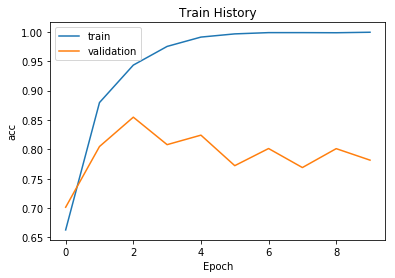

In [85]:
show_train_history(train_history,'acc','val_acc')

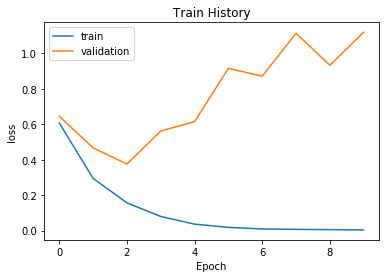

In [86]:
show_train_history(train_history,'loss','val_loss')

In [53]:
scores=model.evaluate(x_test,y_test)
print()
print('accuracy=',scores[1])

25000/25000 [==============================] - 1s 40us/step

accuracy= 0.81788


In [87]:
def predict_review(input_text):
    input_seq=token.texts_to_sequences([input_text])
    pad_input_seq=sequence.pad_sequences(input_seq,maxlen=380)
    predict_result=model.predict_classes(pad_input_seq)
    print(SentimentDict[predict_result[0][0]])

In [88]:
predict_review("Scarlett Johansson is not a good actor and looks like Sid from Ice Age. This whole movie is overrated.")

正面的


In [89]:
predict_review("Avengers endgame is the end of the infinity saga and it is the perfect ending. I may not be good with words but this movie was amazing! I am seeing it again tomorow for the 7th time! It is a little slow in the first hour, but it makes up for it because I am invested in these characters. I am happy with what they did with Thor and hulk because it makes sense in the context of their character ark. Thanos in this movie is not as good as he is in infinity war but that was the same with the heroes. Captain America for example was not very good in infinity war but now he is amazing in endgame. People like infinity war for the villain, and I think people should like endgame for the heroes. After all, these are superHERO movies!")

正面的


# RNN模型

In [90]:
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN

In [93]:
model=Sequential()
model.add(Embedding(output_dim=32,input_dim=3800,input_length=380))
model.add(Dropout(0.35))
model.add(SimpleRNN(16))
model.add(Dense(units=256,activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(units=1,activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 380, 32)           121600    
_________________________________________________________________
dropout_7 (Dropout)          (None, 380, 32)           0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 16)                784       
_________________________________________________________________
dense_7 (Dense)              (None, 256)               4352      
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 126,993
Trainable params: 126,993
Non-trainable params: 0
_________________________________________________________________


In [94]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history=model.fit(x=x_train,y=y_train,validation_split=0.2,epochs=10,batch_size=300,verbose=1)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 19s 950us/step - loss: 0.6227 - acc: 0.6514 - val_loss: 1.3812 - val_acc: 0.3138
Epoch 2/10
20000/20000 [==============================] - 19s 937us/step - loss: 0.3897 - acc: 0.8343 - val_loss: 0.6481 - val_acc: 0.7078
Epoch 3/10
20000/20000 [==============================] - 19s 974us/step - loss: 0.3033 - acc: 0.8810 - val_loss: 0.4973 - val_acc: 0.7860
Epoch 4/10
20000/20000 [==============================] - 19s 939us/step - loss: 0.2640 - acc: 0.8976 - val_loss: 0.4937 - val_acc: 0.7914
Epoch 5/10
20000/20000 [==============================] - 19s 964us/step - loss: 0.2380 - acc: 0.9083 - val_loss: 0.4356 - val_acc: 0.8276
Epoch 6/10
20000/20000 [==============================] - 19s 960us/step - loss: 0.2155 - acc: 0.9161 - val_loss: 0.4958 - val_acc: 0.7996
Epoch 7/10
20000/20000 [==============================] - 19s 945us/step - loss: 0.1862 - acc: 0.9305 - val_loss: 0.7

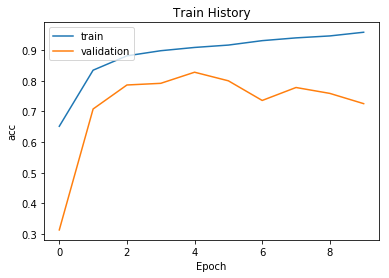

In [95]:
show_train_history(train_history,'acc','val_acc')

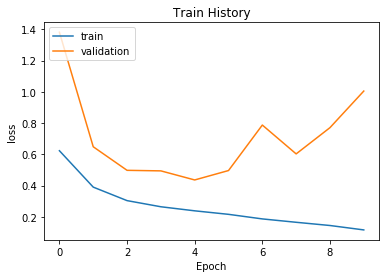

In [96]:
show_train_history(train_history,'loss','val_loss')

In [98]:
scores=model.evaluate(x_test,y_test)
print()
print('accuracy=',scores[1])

25000/25000 [==============================] - 113s 5ms/step

accuracy= 0.82528


In [99]:
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM

In [100]:
model=Sequential()
model.add(Embedding(output_dim=32,input_dim=3800,input_length=380))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dense(units=256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 380, 32)           121600    
_________________________________________________________________
dropout_9 (Dropout)          (None, 380, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_9 (Dense)              (None, 256)               8448      
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 138,625
Trainable params: 138,625
Non-trainable params: 0
_________________________________________________________________


In [101]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history=model.fit(x=x_train,y=y_train,validation_split=0.2,epochs=10,batch_size=300,verbose=1)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 46s 2ms/step - loss: 0.6134 - acc: 0.6611 - val_loss: 0.6321 - val_acc: 0.7478
Epoch 2/10
20000/20000 [==============================] - 46s 2ms/step - loss: 0.3651 - acc: 0.8402 - val_loss: 0.3812 - val_acc: 0.8240
Epoch 3/10
20000/20000 [==============================] - 44s 2ms/step - loss: 0.2744 - acc: 0.8886 - val_loss: 0.4332 - val_acc: 0.8098
Epoch 4/10
20000/20000 [==============================] - 44s 2ms/step - loss: 0.2211 - acc: 0.9142 - val_loss: 0.3140 - val_acc: 0.8666
Epoch 5/10
20000/20000 [==============================] - 44s 2ms/step - loss: 0.2050 - acc: 0.9239 - val_loss: 0.5093 - val_acc: 0.8000
Epoch 6/10
20000/20000 [==============================] - 45s 2ms/step - loss: 0.1879 - acc: 0.9310 - val_loss: 0.5087 - val_acc: 0.8036
Epoch 7/10
20000/20000 [==============================] - 45s 2ms/step - loss: 0.1809 - acc: 0.9314 - val_loss: 0.4718 - val_acc:

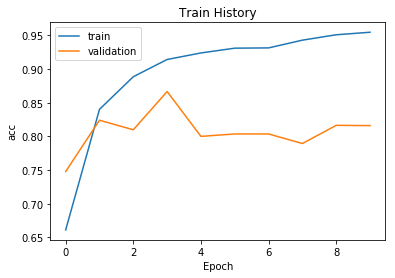

In [102]:
show_train_history(train_history,'acc','val_acc')

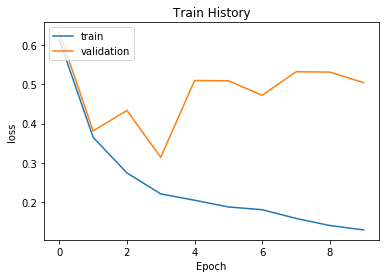

In [103]:
show_train_history(train_history,'loss','val_loss')

In [104]:
scores=model.evaluate(x_test,y_test)
print()
print('accuracy=',scores[1])

25000/25000 [==============================] - 174s 7ms/step

accuracy= 0.85764
